In [1]:
from ROOT import TCanvas, gPad
from ROOT import TH1F, TGraph, TGraphErrors
from ROOT import gStyle
from array import array
import math
import random

c1 = TCanvas( 'c1', 'Simple Chaos Example', 200, 10, 1000, 800 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 42 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.Divide(2,2)

Welcome to JupyROOT 6.18/02


In [2]:
def growthfunction(x,par):
    return par[0]*x*(1.0-x)

In [3]:
gStyle.SetOptFit(1)

In [4]:
nstart = 1000
npoints = 40
lambda_points = 1000
lambda_min = 3.4
lambda_max = 3.95
xstart = 0.3

n = nstart+npoints
nvalues = npoints
lambda_n = lambda_points

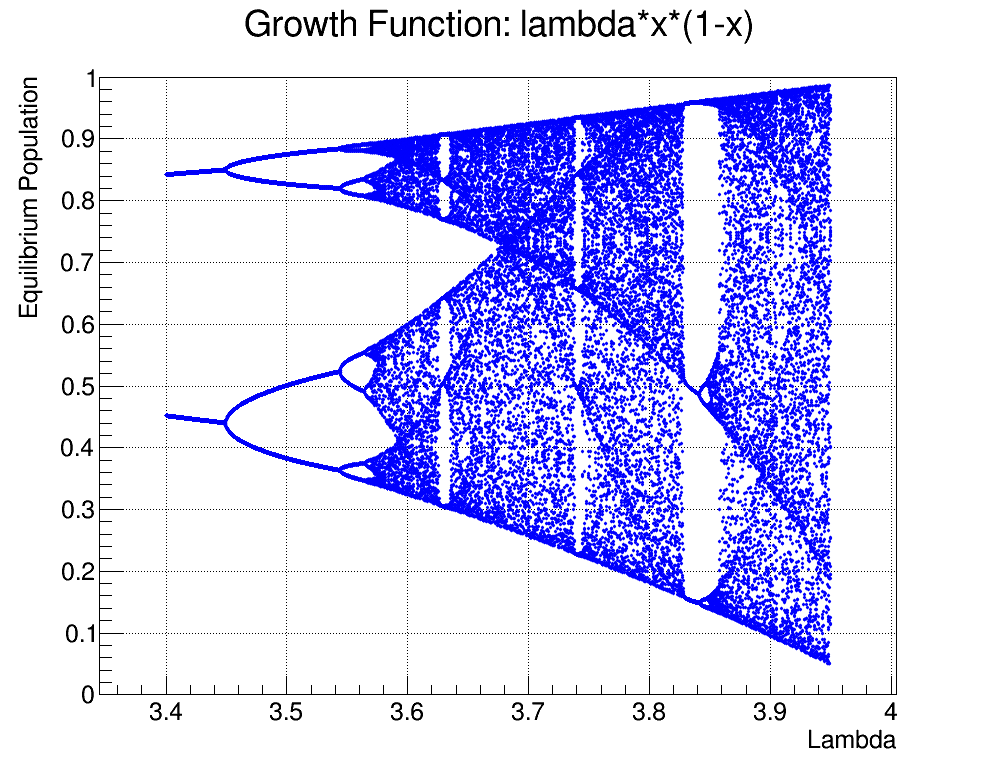

In [5]:
population = array('d')
year = array('d')
lmbda = array('d')
lambda_now =array('d')
xvalue = array('d')
myvalues = array('d')
lambdavalues = array('d')


for i in range(0,n):
    year.append(0)
    population.append(0)

lambda_now.append(0)

c1.cd()
for j in range(0,lambda_n):
    lmbda.append(lambda_min + (lambda_max-lambda_min)*j/lambda_n)
    year[0] = 0.0
    population[0] = 0.3
    lambda_now[0] = lmbda[j]
    
    for i in range(1,n):
        year[i]=i
        x = population[i-1]
        population[i]=growthfunction(x,lambda_now)
        if (i>=nstart):
            #print(j,i,population[i],lambda_now[0])
            myvalues.append(population[i])
            lambdavalues.append(lambda_now[0])
    
gr = TGraph(nvalues*lambda_n,lambdavalues,myvalues);

#axis = gr.GetAxis()
#axis.SetLimits(lambda_min,lambda_max)
gr.GetHistogram().SetMaximum(1.0)
gr.GetHistogram().SetMinimum(0.0)
gr.SetMarkerColor(4)
gr.SetMarkerStyle(20)
gr.SetMarkerSize(0.3)
gr.SetTitle("Growth Function: lambda*x*(1-x)")
gr.GetXaxis().SetTitle("Lambda")
gr.GetYaxis().SetTitle("Equilibrium Population")


gr.Draw("AP")
c1.Draw()

In [6]:
#print(nvalues*lambda_n)
#print(lambdavalues,myvalues)